In [9]:
import sqlalchemy

#Database details
user = 'postgres'
password = '123@abc'
db = 'KasaDaka'
host='127.0.0.1'
port=5432

In [10]:
#Function: Connection and Metadata
def connect(user, password, db, host, port):
    url = 'postgresql://{}:{}@{}:{}/{}'
    url = url.format(user, password, host, port, db)
    con = sqlalchemy.create_engine(url, client_encoding='utf8')
    meta = sqlalchemy.MetaData(bind=con, reflect=True)
    return con, meta

con, meta = connect(user, password, db, host, port)

/home/benny/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
/home/benny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SADeprecationWarning: reflect=True is deprecate; please use the reflect() method.
  del sys.path[0]


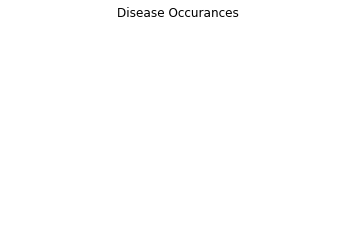

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def make_plot():
    query = con.execute("SELECT _visited_element_id FROM service_development_callsessionstep")
    query = query.fetchall()
    disease_dict = {16:"Bursal Disease", 17:"Fowl Pox", 18:"Marek's Disease", 19:"Newcastle Disease"}
    count_list = []
    for item in query:
        if item[0] in disease_dict.keys():
            count_list.append(disease_dict[item[0]])     
    #Data
    count = Counter(count_list)
    labels = count.keys()
    fracs = count.values()
    # Make square figures and axes
    plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)
    plt.title('Disease Occurances')
    plt.savefig('disease_graph.jpg')
    plt.show()
    return 
    
make_plot()